In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [37]:
from fastai.vision.all import *
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## Reading in the dataset

In [38]:
train = pd.read_csv('../input/fgvc-aircraft/train.csv')
val = pd.read_csv('../input/fgvc-aircraft/val.csv')
test = pd.read_csv('../input/fgvc-aircraft/test.csv')

In [39]:
train.head()

,filename,Classes,Labels
0,1025794.jpg,707-320,0
1,1340192.jpg,707-320,0
2,0056978.jpg,707-320,0
3,0698580.jpg,707-320,0
4,0450014.jpg,707-320,0


In [41]:
# img_path = "../input/fgvc-aircraft/fgvc-aircraft-2013b/fgvc-aircraft-2013b/data/images"

# train_img_path = train.filename.apply(lambda x: os.path.join(img_path, x))
# # print(train_img_path.values)

# val_img_path = val.filename.apply(lambda x: os.path.join(img_path, x))
# # print(val_img_path.values)

# test_img_path = test.filename.apply(lambda x: os.path.join(img_path, x))
# # print(test_img_path.values)

## Checking Aircraft Types

Checking to see if the three datasets (train, val, test) have all the same aircraft types, and also to see what aircraft types are in the dataset.

In [42]:
unique_train = train['Classes'].unique().tolist()
unique_val = val['Classes'].unique().tolist()
unique_test = test['Classes'].unique().tolist()

print(unique_train == unique_val)
print(unique_train == unique_test)
print(unique_test == unique_val)
print(unique_train)

True
True
True
['707-320', '727-200', '737-200', '737-300', '737-400', '737-500', '737-600', '737-700', '737-800', '737-900', '747-100', '747-200', '747-300', '747-400', '757-200', '757-300', '767-200', '767-300', '767-400', '777-200', '777-300', 'A300B4', 'A310', 'A318', 'A319', 'A320', 'A321', 'A330-200', 'A330-300', 'A340-200', 'A340-300', 'A340-500', 'A340-600', 'A380', 'ATR-42', 'ATR-72', 'An-12', 'BAE 146-200', 'BAE 146-300', 'BAE-125', 'Beechcraft 1900', 'Boeing 717', 'C-130', 'C-47', 'CRJ-200', 'CRJ-700', 'CRJ-900', 'Cessna 172', 'Cessna 208', 'Cessna 525', 'Cessna 560', 'Challenger 600', 'DC-10', 'DC-3', 'DC-6', 'DC-8', 'DC-9-30', 'DH-82', 'DHC-1', 'DHC-6', 'DHC-8-100', 'DHC-8-300', 'DR-400', 'Dornier 328', 'E-170', 'E-190', 'E-195', 'EMB-120', 'ERJ 135', 'ERJ 145', 'Embraer Legacy 600', 'Eurofighter Typhoon', 'F-16A/B', 'F/A-18', 'Falcon 2000', 'Falcon 900', 'Fokker 100', 'Fokker 50', 'Fokker 70', 'Global Express', 'Gulfstream IV', 'Gulfstream V', 'Hawk T1', 'Il-76', 'L-1011'

## Labelling

Assigning labels to each row, depending on the 'classes' column. If the aircraft type labelled starts with a '7' or Boeing, it is a Boeing aircraft.

In [43]:
img_path = "/kaggle/input/fgvc-aircraft/fgvc-aircraft-2013b/fgvc-aircraft-2013b/data/images"

for i, dtframe in enumerate([train, val, test]):

    #Drop original Labels column
    
    dtframe = dtframe.drop(columns=['Labels'])
    
    #Assign new Label column
    
    dtframe['Label'] = dtframe['Classes'].apply(lambda x: 1 if x[0]=='7' or x.split(' ')[0]=='Boeing' else 0)

    #Add filepath

    # dtframe['filepath'] = dtframe.filename.apply(lambda x: os.path.join(img_path, x))
    # Update the original dataframe
    
    if i == 0:
        train = dtframe
    elif i == 1:
        val = dtframe
    elif i == 2:
        test = dtframe

In [9]:
test[test['Classes']=="747-100"]

,filename,Classes,Label
333,2217964.jpg,747-100,1
334,1821602.jpg,747-100,1
335,0136486.jpg,747-100,1
336,0338531.jpg,747-100,1
337,1626629.jpg,747-100,1
338,1415611.jpg,747-100,1
339,1013534.jpg,747-100,1
340,0851311.jpg,747-100,1
341,1041645.jpg,747-100,1
342,0814397.jpg,747-100,1


## Distribution of datasets

Approximately 21% of aircrafts in the 3 datasets are Boeing, and each dataset contains approximately 3334 aircraft pictures.

In [53]:
no_train_boeing = len(train[train['Label'] == 1])
no_train_notboeing = len(train[train['Label'] == 0])

no_val_boeing = len(val[val['Label'] == 1])
no_val_notboeing = len(val[val['Label'] == 0])

no_test_boeing = len(test[test['Label'] == 1])
no_test_notboeing = len(test[test['Label'] == 0])

print(no_train_boeing, no_train_notboeing)
print(no_val_boeing, no_val_notboeing)
print(no_test_boeing, no_test_notboeing)

733 2601
733 2600
734 2599


## Preparing the training dataset

I loaded the images using the filepaths from both the train and val dataframes into DataLoaders, then combined both into a single DataLoader to be fed into the model. DataLoader is a class in fastai (and by extension PyTorch) to enable iterations through a DataSet object in batches.

/usr/local/lib/python3.10/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/usr/local/lib/python3.10/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


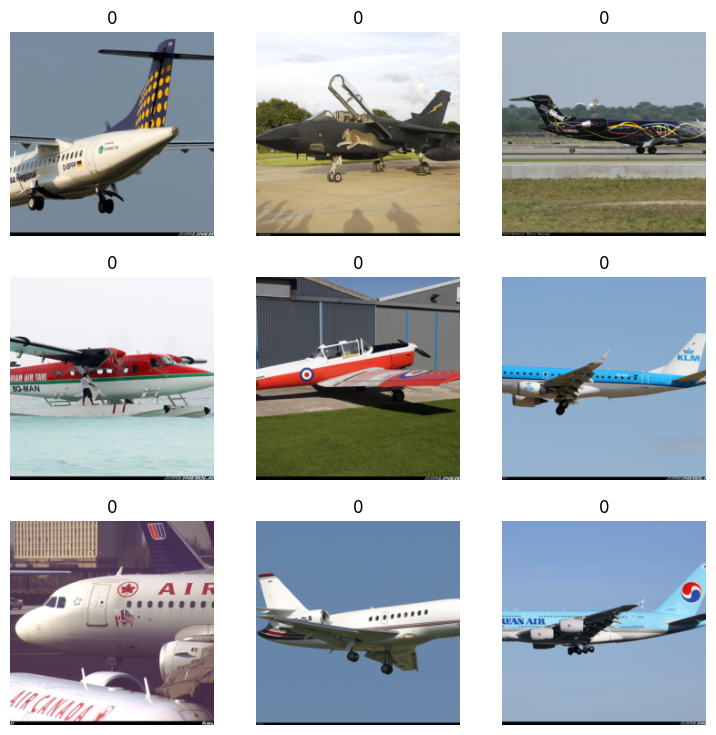

In [44]:
train_set = ImageDataLoaders.from_df(train, path='.', folder=img_path, fn_col=0, label_col=2, item_tfms=Resize(224))
val_set = ImageDataLoaders.from_df(val, path='.', folder=img_path, fn_col=0, label_col=2, item_tfms=Resize(224))

dls = DataLoaders(train_set.train, val_set.valid)
dls.show_batch()

# train_set.show_batch()
# print(train_set)

## Train the model

I used a resnet34 pre-trained model as it offers the best performance while balancing the trade-off in running time due to the size of the model. Fine-tuning was set at 3 epochs to prevent overfitting.

In [14]:
# learn = vision_learner(dls, resnet34, metrics=accuracy)
# learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 168MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.005463,0.677350,0.683183,11:17


epoch,train_loss,valid_loss,accuracy,time
0,0.658978,0.497230,0.771772,10:17
1,0.500767,0.434482,0.807808,10:18
2,0.352221,0.423069,0.812312,10:13


## Export model

In [18]:
# learn.export('model.pkl')

## Evaluating the model on a test set

In [45]:
learn = load_learner('/kaggle/input/model/pytorch/original/1/model.pkl')

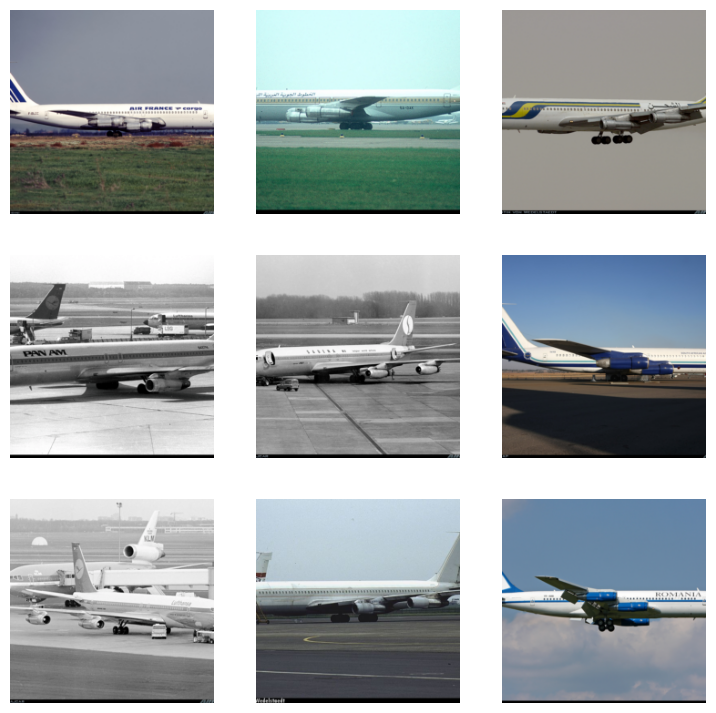

In [46]:
tst_dl = learn.dls.test_dl(test)
tst_dl.show_batch()

In [47]:
preds,_ = learn.get_preds(dl=tst_dl)

print(preds)

tensor([[0.0150, 0.9850],
        [0.9259, 0.0741],
        [0.6473, 0.3527],
        ...,
        [0.9519, 0.0481],
        [0.9925, 0.0075],
        [0.9250, 0.0750]])


In [48]:
test['Prediction'] = (preds[:,1]>=0.5).int()

test.head()

,filename,Classes,Label,Prediction
0,1514522.jpg,707-320,1,1
1,0747566.jpg,707-320,1,0
2,1008575.jpg,707-320,1,0
3,0717480.jpg,707-320,1,0
4,0991569.jpg,707-320,1,1


In [49]:
class_names = ['Not Boeing', 'Boeing']

print(classification_report(test['Label'], test['Prediction'], target_names=class_names))

              precision    recall  f1-score   support

  Not Boeing       0.91      0.86      0.88      2599
      Boeing       0.58      0.69      0.63       734

    accuracy                           0.82      3333
   macro avg       0.75      0.77      0.76      3333
weighted avg       0.84      0.82      0.83      3333



The model achieved an overall accuracy of 82%, although it is noticeably poorer at detecting Boeing planes than non-Boeing planes, with a precision of 58% and 91% respectively.

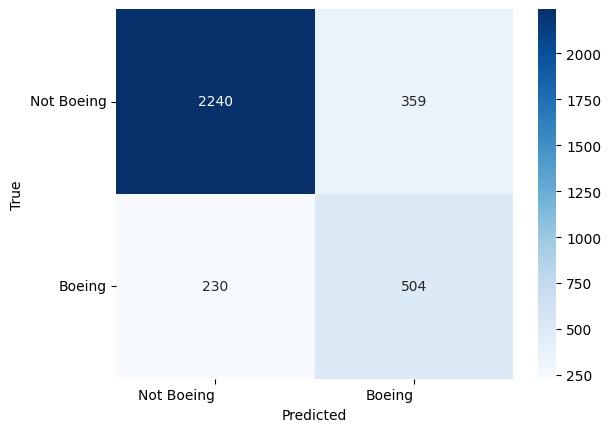

In [50]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation = 0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation = 0, ha='right')
    plt.ylabel('True')
    plt.xlabel('Predicted')

cm = confusion_matrix(test['Label'], test['Prediction'])
df_cm = pd.DataFrame(cm, index=class_names, columns = class_names)
show_confusion_matrix(df_cm)